In [62]:
import numpy as np 
import pandas as pd 

**Работа со встроенными набрами данных в scikit-learn**

Набор данных California House Prices

In [63]:
from sklearn.datasets import fetch_california_housing

In [64]:
california = fetch_california_housing()

In [65]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [66]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

Данные о недвижимости

In [67]:
data = california.data

In [68]:
data.shape

(20640, 8)

In [69]:
data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

Target - величина, которую требуется предсказать (цена на недвижимость)

In [70]:
target = california.target
target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Название признаков

In [71]:
feature_names = california.feature_names

In [72]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Описание датасета

In [73]:
for line in california.DESCR.split('\n'):
    print(line)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Создадим два датафрейма

In [74]:
X = pd.DataFrame(data, columns=feature_names)

In [75]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [76]:
X.shape

(20640, 8)

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [78]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [79]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


**Разбиение данных на тренировочный и тестовый датасеты**

In [80]:
from sklearn.model_selection import train_test_split

1 выборка - тренировочная (обучаем модель)

2 выборка - тестовая (проверка работы нашей модели - сравниваем значение цены с предсказанными значениями)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Построим модели линейной регрессии**

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()

Задача линейной регрессии - найти подходящие коэффициенты w при признаках x для вычисления целевой переменной y, минимизируя ошибку e:

y = w<sub>0</sub> + w<sub>1</sub> * x<sub>1</sub> + w<sub>2</sub> * x<sub>2</sub> + ... + w<sub>m</sub> * x<sub>m</sub> + e

In [84]:
lr.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred = lr.predict(X_test)

In [86]:
check_test = pd.DataFrame({'y_test': y_test['price'], 'y_pred': y_pred.flatten()}, columns=['y_test', 'y_pred'])

In [88]:
check_test.head(10)

,y_test,y_pred
20046,0.47700,0.724128
3024,0.45800,1.766778
15663,5.00001,2.711516
20484,2.18600,2.836012
9814,2.78000,2.603755
13311,1.58700,2.011968
7113,1.98200,2.640159
7668,1.57500,2.166153
18246,3.40000,2.746566
5723,4.46600,3.904158


**Метрики оценки качества регрессионных моделей**

Средняя квадратичная ошибка

In [89]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [90]:
check_test.head()

,y_test,y_pred,error
20046,0.47700,0.724128,0.247128
3024,0.45800,1.766778,1.308778
15663,5.00001,2.711516,-2.288494
20484,2.18600,2.836012,0.650012
9814,2.78000,2.603755,-0.176245


In [91]:
initial_mse = (check_test['error'] ** 2).mean()
initial_mse

np.float64(0.5411287478470695)

In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

0.5411287478470695

Средняя абсолютная ошибка (не так сильно реагирует на выбросы в данных)

In [94]:
(np.abs(check_test['error'])).mean()

np.float64(0.529696401291945)

In [95]:
from sklearn.metrics import mean_absolute_error

In [96]:
mean_absolute_error(y_test, y_pred)

0.529696401291945

*R<sup>2</sup>*

In [97]:
from sklearn.metrics import r2_score

In [98]:
r2_score(y_test, y_pred)

0.5910509795491345

**Просмотр коэффициентов линейной регрессии**

*w<sub>0</sub>*

In [99]:
lr.intercept_

array([-37.02782759])

*w<sub>1</sub> ... w<sub>m</sub>*

In [100]:
lr.coef_

array([[ 4.47600069e-01,  9.56752596e-03, -1.24755956e-01,
         7.94471254e-01, -1.43902596e-06, -3.44307993e-03,
        -4.18555257e-01, -4.33405135e-01]])

In [103]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

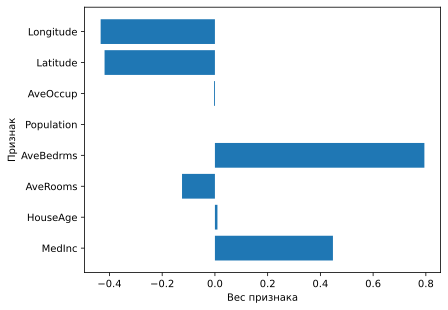

In [108]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

plt.show()

In [111]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,15480.0,3.878314,1.903788,0.499900,2.566925,3.543900,4.762500,15.000100
HouseAge,15480.0,28.595995,12.611330,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,15480.0,5.435598,2.421650,0.888889,4.450000,5.232331,6.058141,141.909091
AveBedrms,15480.0,1.096881,0.438804,0.333333,1.006593,1.049346,1.100143,25.636364
Population,15480.0,1427.497287,1142.930862,3.000000,788.750000,1167.000000,1727.000000,35682.000000
AveOccup,15480.0,3.106660,11.955834,0.692308,2.430205,2.817672,3.280020,1243.333333
Latitude,15480.0,35.646720,2.133950,32.550000,33.940000,34.270000,37.720000,41.950000
Longitude,15480.0,-119.583736,2.002442,-124.350000,-121.800000,-118.510000,-118.010000,-114.310000


можем заметить что у нас разный разброс наших признаков (std)

**Стандартизация признаков**

При стандартизации от признака нужно отнять среднее и поделить на среднеквадратичное отклонение:

x<sub>scaled</sub> = (x - x<sub>mean</sub>) / (std<sub>x</sub>)

Применим стандартизацию

In [112]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

In [117]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.17648852,  0.66640687, -0.06085431, ..., -0.04828325,
        -0.8607415 ,  0.73099911],
       [ 0.77137436,  1.06288858,  0.38352076, ..., -0.05872947,
         0.70916822, -1.19670983],
       [ 0.02142423,  0.58711053,  0.27852339, ..., -0.07283798,
         1.31370062, -1.55128842],
       ...,
       [-0.49582442,  0.58711053, -0.5983225 , ...,  0.01885405,
        -0.75764295,  0.60115343],
       [ 0.96699069, -1.07811266,  0.39633361, ...,  0.0060417 ,
         0.90599273, -1.1867217 ],
       [-0.68434939,  1.855852  , -0.83954627, ..., -0.08347358,
         0.99503238, -1.41644868]])

In [119]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.176489,0.666407,-0.060854,-0.281118,-0.496544,-0.048283,-0.860741,0.730999
1,0.771374,1.062889,0.383521,-0.020378,-0.411672,-0.058729,0.709168,-1.196710
2,0.021424,0.587111,0.278523,-0.084625,-0.626915,-0.072838,1.313701,-1.551288
3,1.309004,0.269925,0.233072,-0.243135,-0.234928,-0.069768,-0.696721,0.586171
4,-0.793136,-0.919520,-0.264184,-0.139881,-0.631290,-0.085141,1.369936,-0.872096
...,...,...,...,...,...,...,...,...
15475,1.308847,0.507814,0.286357,-0.388828,-0.673288,-0.006223,-0.874800,0.810904
15476,-0.435101,0.349222,0.591764,0.393370,0.284806,0.066712,-0.762329,1.075590
15477,-0.495824,0.587111,-0.598322,-0.039164,0.287431,0.018854,-0.757643,0.601153
15478,0.966991,-1.078113,0.396334,-0.065869,0.305805,0.006042,0.905993,-1.186722


In [120]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.15411223, -0.28514924, -0.51346718, ...,  0.06447083,
         0.19367548,  0.28652736],
       [-0.70756701,  0.11133247, -0.16361884, ..., -0.03570466,
        -0.23746391,  0.06179445],
       [-0.20917611,  1.855852  , -0.6022714 , ..., -0.14606959,
         1.00909127, -1.4264368 ],
       ...,
       [-0.89908611,  0.66640687, -0.89340574, ...,  0.12360294,
        -0.76232924,  0.66108221],
       [ 1.58036659, -1.79177974,  0.80393479, ..., -0.04836253,
         1.34181841, -0.73725589],
       [ 1.44652384,  0.58711053,  0.12349223, ..., -0.04755791,
        -0.82325111,  0.5911653 ]])

In [121]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-1.154112,-0.285149,-0.513467,-0.170006,-0.031059,0.064471,0.193675,0.286527
1,-0.707567,0.111332,-0.163619,0.220178,0.120311,-0.035705,-0.237464,0.061794
2,-0.209176,1.855852,-0.602271,0.202822,-0.102807,-0.146070,1.009091,-1.426437
3,0.976656,-0.919520,0.300647,-0.174751,0.242807,0.028254,-0.640486,0.431355
4,-0.080534,0.428518,0.023700,-0.156895,-0.318925,-0.052111,0.456108,-1.171740
...,...,...,...,...,...,...,...,...
5155,1.443320,1.776556,0.039897,-0.278246,-0.574417,-0.079210,-0.752957,0.581177
5156,-0.886952,0.111332,-0.382606,-0.345101,-0.890281,-0.052011,2.124430,-1.311573
5157,-0.899086,0.666407,-0.893406,-0.090976,0.652294,0.123603,-0.762329,0.661082
5158,1.580367,-1.791780,0.803935,-0.152251,0.810664,-0.048363,1.341818,-0.737256


In [122]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

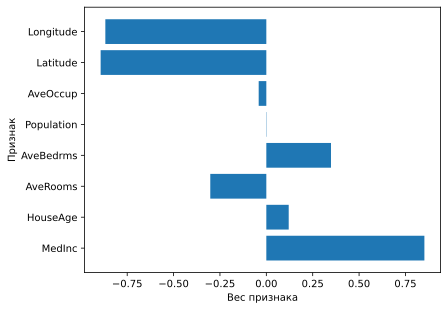

In [125]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

Видим оценку вклада каждого признака

Теперь уберем из модели признаки, которые имеют веса близкие к нулю (грубый метод) (< 0.1)

In [187]:
feats = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']

In [141]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred = model.predict(X_test.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [188]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

0.541170397586109

In [140]:
# Сверяем с исходной ошибкой
initial_mse

0.5411287478470695

Наша модель со всеми признаками имеет ошибку лучше чем без одного, поэтому исправим feats

In [189]:
feats = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

**Модели линейной регрессии с регуляризацией** (проблема переобучения - модель хорошо предсказывает на прошлых данных, но плохо на новых)

In [151]:
from sklearn.linear_model import Lasso, Ridge

Lasso (линейная регрессия с L1-регуляризацией)

In [196]:
# Параметр alpha отвечает за регуляризацию
model = Lasso(alpha=0.003)

In [197]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

0.5380580864248029

Ridge (линейная регрессия с L2-регуляризацией)

In [198]:
# Параметр alpha отвечает за регуляризацию
model = Ridge(alpha=0.001)

In [199]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

0.5411287163746185

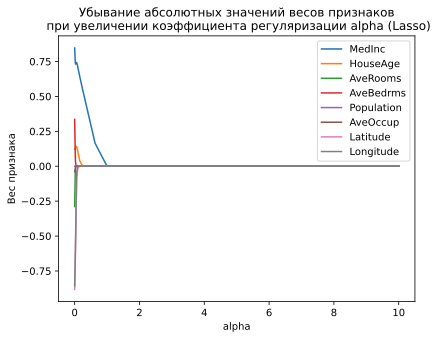

In [207]:
n = 21
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 1, n)
for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val)
    lasso.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = lasso.coef_.flatten()

for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)
plt.show()

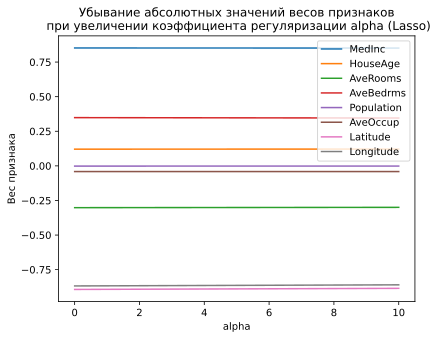

In [210]:
n = 21
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 1, n)
for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val)
    ridge.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)
plt.show()